In [2]:
import scanpy as sc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

In [3]:
adata = sc.read_csv('/Users/mennayoussef/Downloads/GSE171524_RAW/GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

# Data Preprocessing

In [4]:
# filter genes that are expressed in less than 10 cells
sc.pp.filter_genes(adata, min_cells = 10)

# only keep highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [5]:
# detect mitochondrial genes
adata.var['mt'] = adata.var.index.str.startswith('MT-')

In [6]:
# detect ribosomal genes
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [7]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [8]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [9]:
adata.var.sort_values('n_cells_by_counts')

,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ATP6V0C,10,True,1486.0,0.002459,0.007373,1.555576,False,False,10,0.002459,99.836039,15.0
LINC01173,10,True,1387.0,0.002295,0.003930,1.599655,False,False,10,0.002295,99.836039,14.0
AC011396.2,10,True,1889.0,0.001968,0.002948,1.432033,False,False,10,0.001968,99.836039,12.0
AC073091.3,10,True,546.0,0.003279,0.008189,2.254946,False,False,10,0.003279,99.836039,20.0
KCNH5,10,True,1286.0,0.002131,0.004095,1.652942,False,False,10,0.002131,99.836039,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
PRKG1,2170,True,973.0,2.086899,23.688413,1.841435,False,False,2170,2.086900,64.420397,12728.0
PDE4D,2190,True,522.0,2.615019,43.779610,2.297422,False,False,2190,2.615019,64.092474,15949.0
FTO,2284,True,1282.0,0.695196,3.469723,1.654960,False,False,2284,0.695196,62.551238,4240.0
ANK3,2522,True,1456.0,2.236924,22.783969,1.570576,False,False,2522,2.236924,58.648959,13643.0


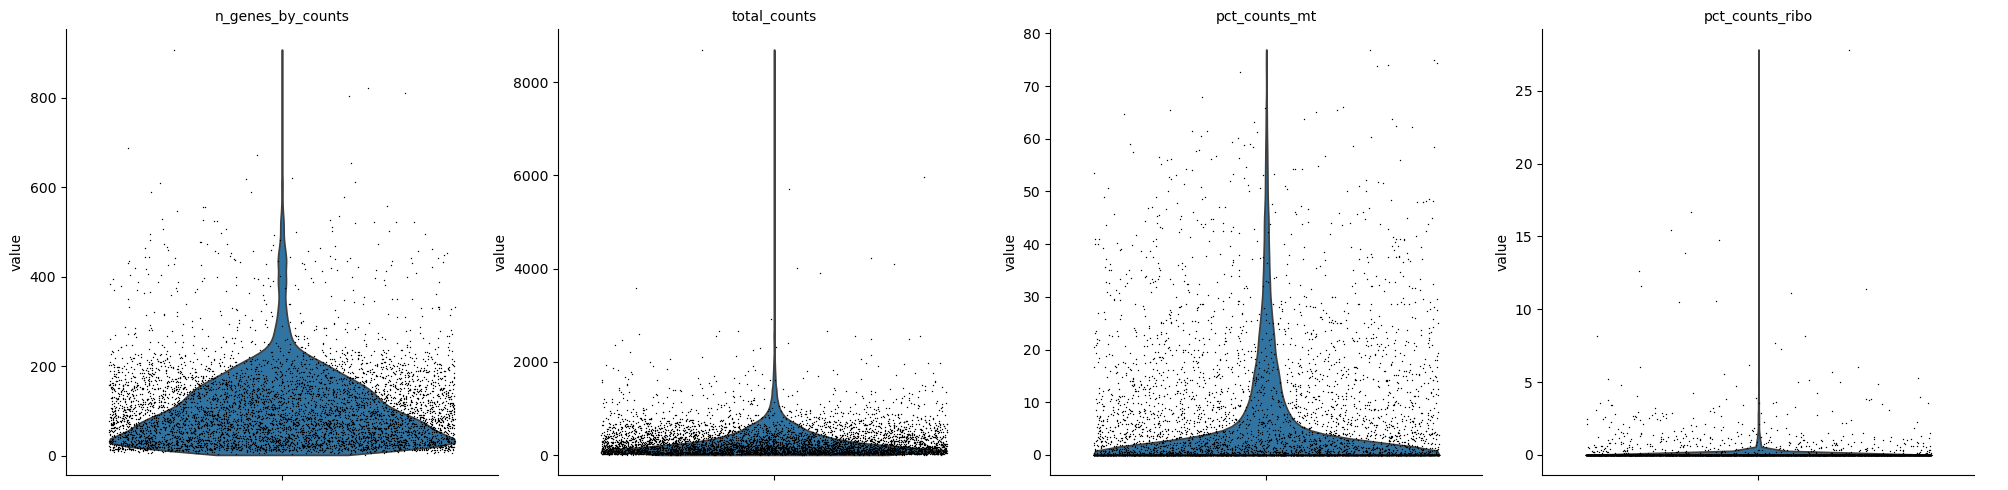

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [11]:
import numpy as np
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
upper_lim

388.03999999999996

In [12]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [13]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
ACTGATGTCTGCACCT-1_1,363,2058.0,0.0,0.000000,0.0,0.000000
TTGGTTTTCCTAGCTC-1_1,283,2259.0,463.0,20.495794,4.0,0.177070
GGGAAGTAGCGACCCT-1_1,381,1956.0,559.0,28.578732,8.0,0.408998
TCTATCACAAGGCTTT-1_1,315,1656.0,183.0,11.050725,1.0,0.060386
CACTTCGCAGTACTAC-1_1,279,1715.0,253.0,14.752187,6.0,0.349854
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,100,131.0,3.0,2.290076,0.0,0.000000
CACTGGGGTCTACGTA-1_1,43,68.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,21,24.0,2.0,8.333334,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,35,51.0,0.0,0.000000,2.0,3.921569


In [14]:
# remove ribosomal and mitochondrial genes
adata = adata[adata.obs.pct_counts_mt < 20]
adata = adata[adata.obs.pct_counts_ribo < 2]
adata

View of AnnData object with n_obs × n_vars = 5320 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'hvg'

# Normalization

In [15]:
sc.pp.normalize_total(adata, target_sum = 1e4)

/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
adata.X.sum(axis=1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

# Log transformation

In [17]:
sc.pp.log1p(adata)

In [18]:
adata.X.sum(axis=1)

array([1018.5006 ,  921.1619 ,  824.02496, ...,  228.81818,  128.51732,
        307.66254], dtype=float32)

In [19]:
# save the normalized raw counts before further modifications
raw_data = adata

# PCA

In [20]:
sc.tl.pca(adata, svd_solver='arpack')

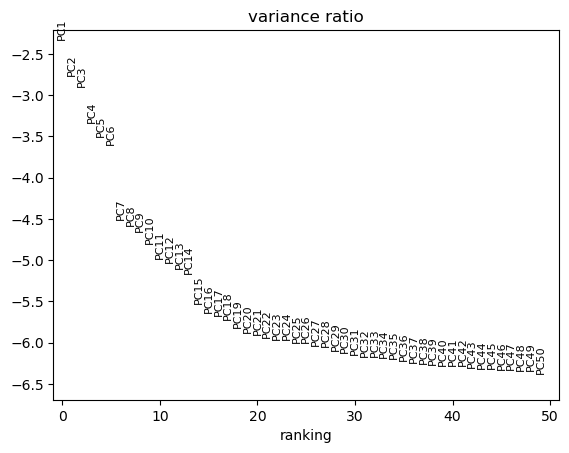

In [21]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [22]:
sc.pp.neighbors(adata, n_pcs = 30)

In [23]:
#obsp shows matrices that will be used to do the clustering
adata

AnnData object with n_obs × n_vars = 5320 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'hvg', 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# UMAP

In [24]:
sc.tl.umap(adata)

/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


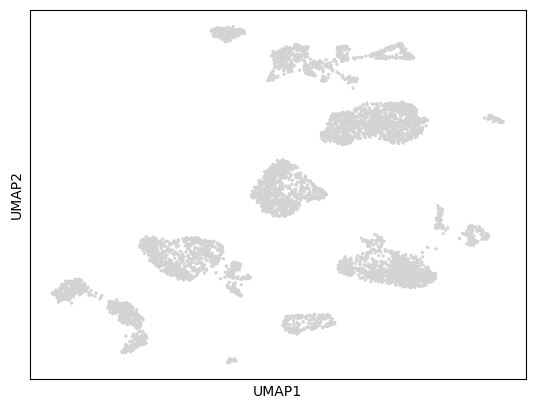

In [25]:
sc.pl.umap(adata)

In [26]:
!pip install leidenalg

/Users/mennayoussef/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [34]:
sc.tl.leiden(adata, resolution = 1)

In [35]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
ACTGATGTCTGCACCT-1_1,363,2058.0,0.0,0.000000,0.0,0.000000,11
TCTATCACAAGGCTTT-1_1,315,1656.0,183.0,11.050725,1.0,0.060386,16
CACTTCGCAGTACTAC-1_1,279,1715.0,253.0,14.752187,6.0,0.349854,16
GTCAAACAGAACGTGC-1_1,375,1698.0,7.0,0.412250,0.0,0.000000,1
CATACTTTCATCACTT-1_1,371,1499.0,101.0,6.737825,0.0,0.000000,1
...,...,...,...,...,...,...,...
TCATGCCCAAGAGGTC-1_1,100,162.0,6.0,3.703704,0.0,0.000000,12
CGCCATTGTTTGCCGG-1_1,100,131.0,3.0,2.290076,0.0,0.000000,12
CACTGGGGTCTACGTA-1_1,43,68.0,0.0,0.000000,0.0,0.000000,11
CATACTTGTAGAGGAA-1_1,21,24.0,2.0,8.333334,0.0,0.000000,0


/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


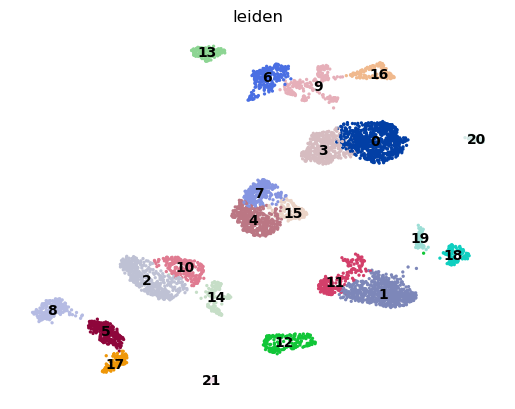

In [46]:
sc.pl.umap(adata, color=['leiden'], frameon = False, legend_loc = "on data")

In [37]:
adata

AnnData object with n_obs × n_vars = 5320 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

 # Find markers and label cell types

In [38]:
sc.tl.leiden(adata, resolution = 1)

In [39]:
sc.tl.rank_genes_groups(adata, 'leiden')

/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: Da

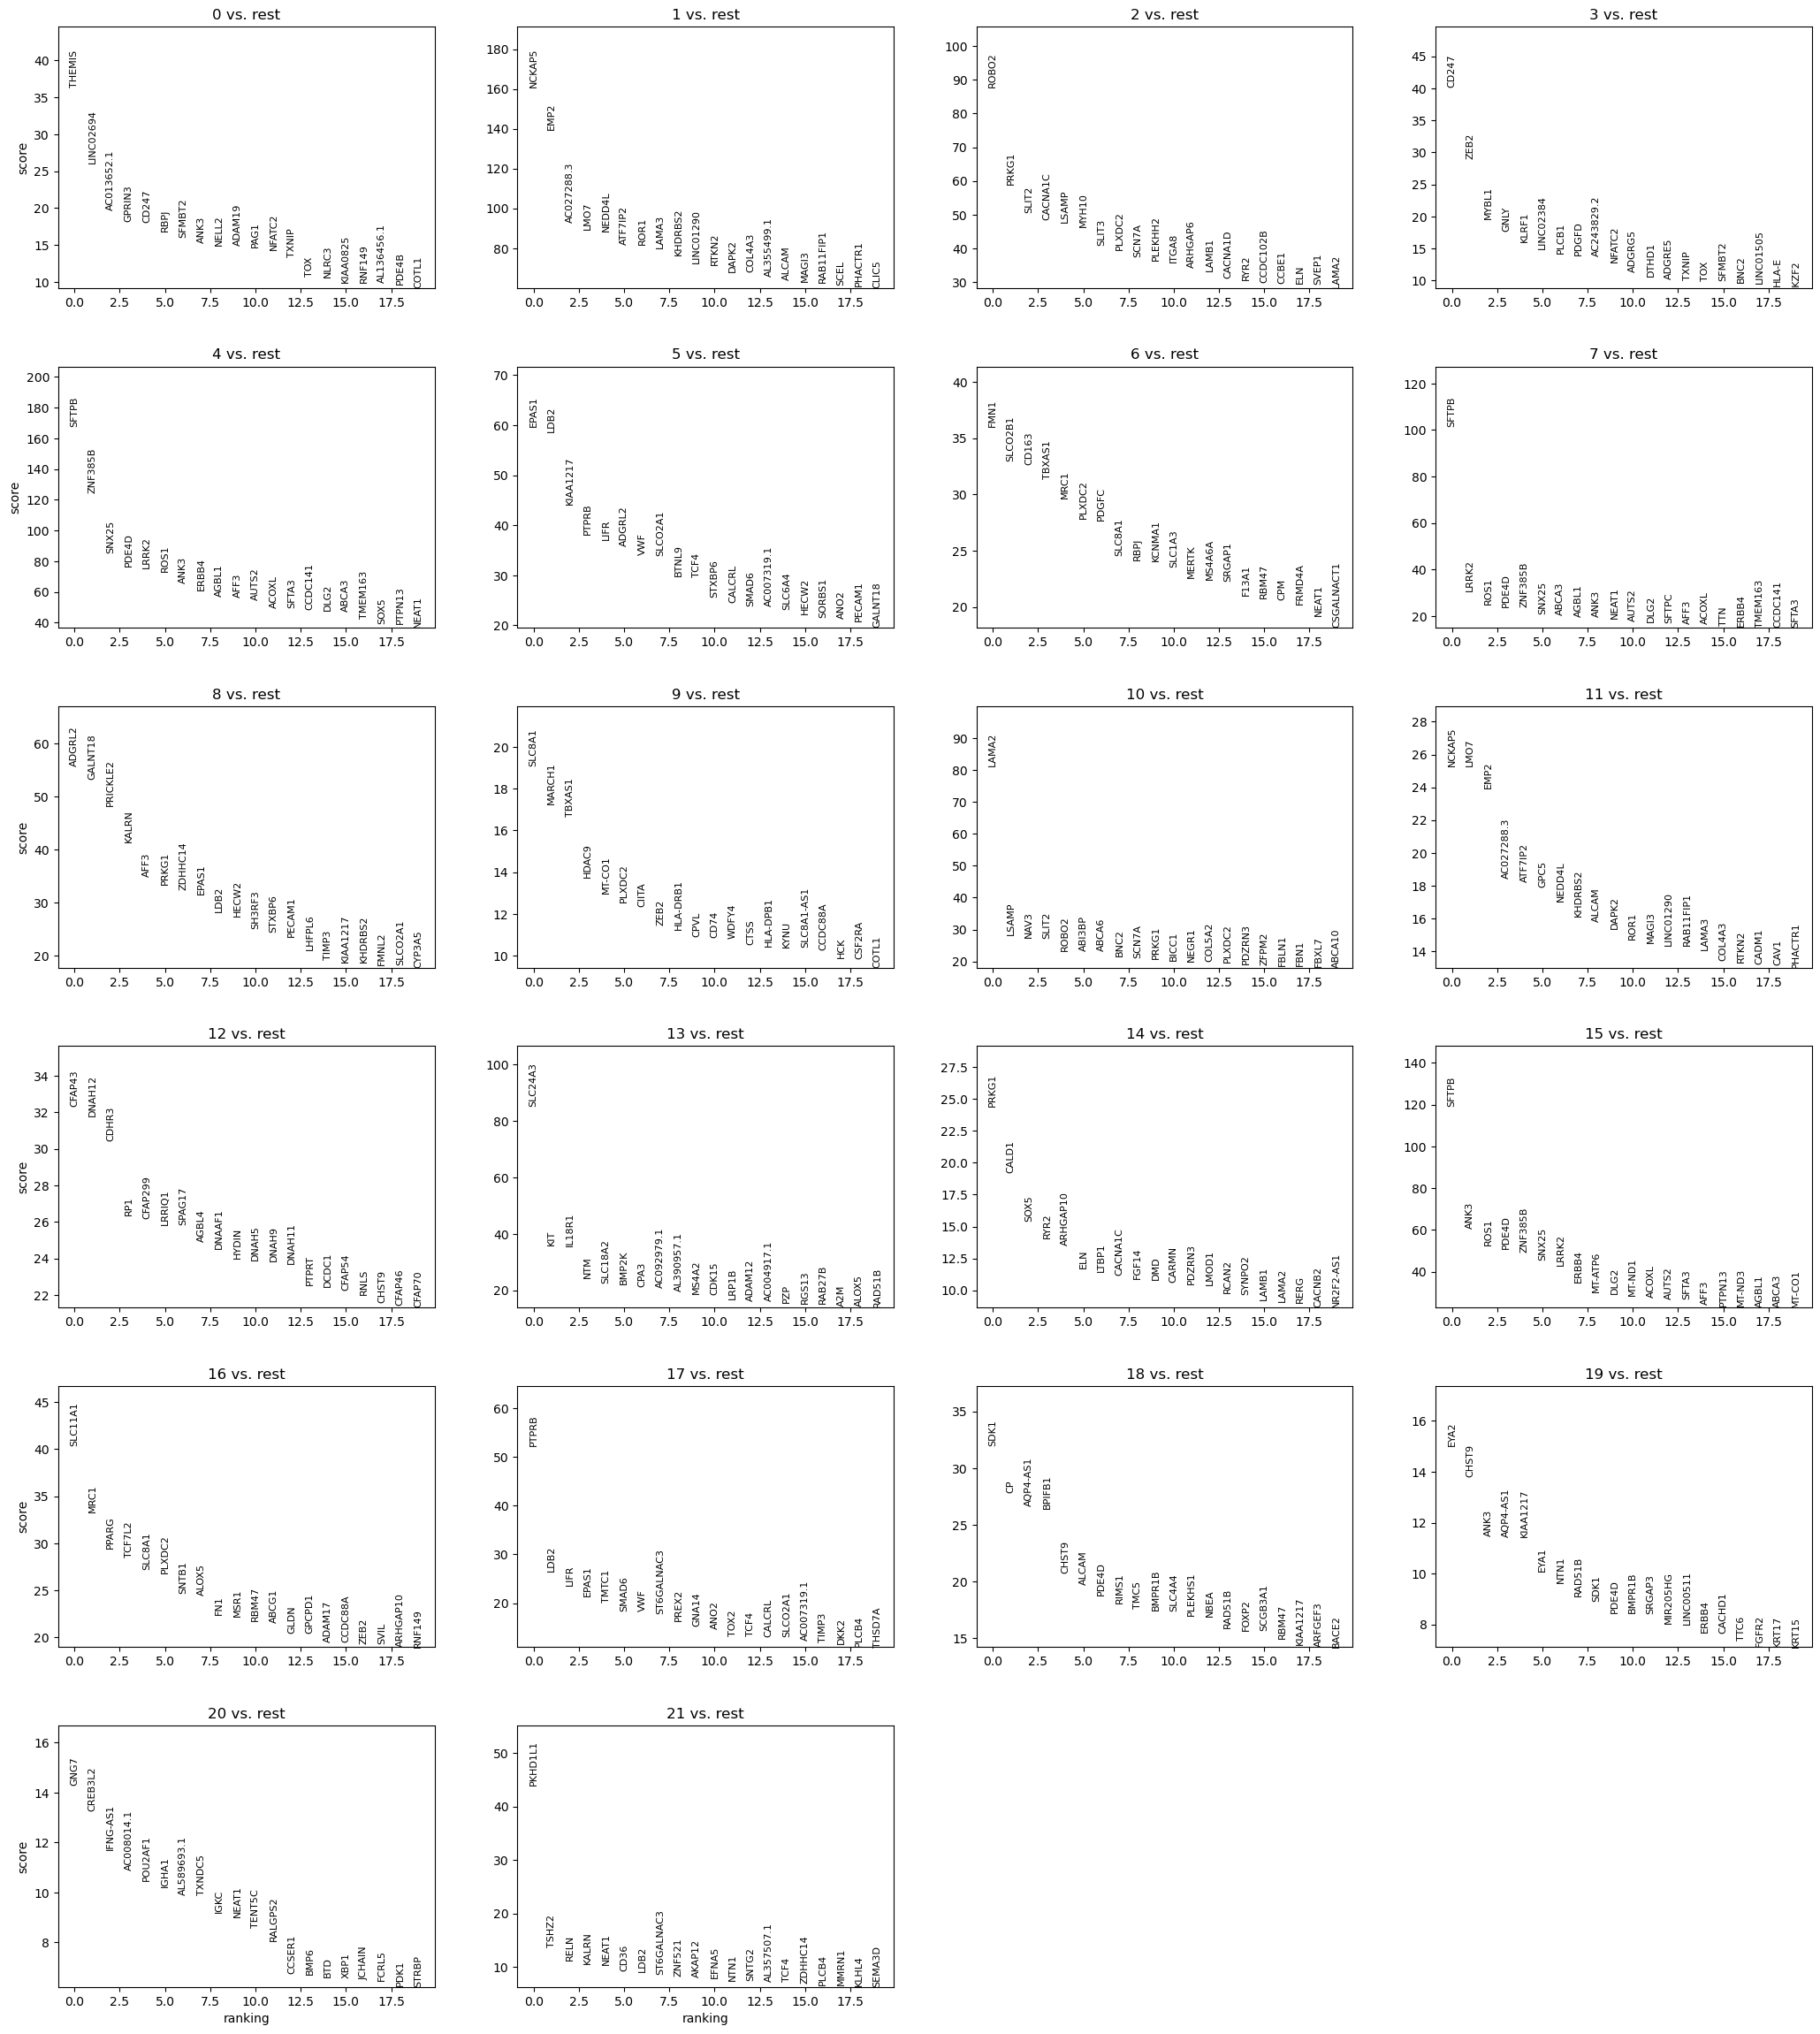

In [33]:
# rank the most significant genes in each cluster
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [44]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,THEMIS,36.400696,9.574377,1.134924e-167,1.746037e-166
1,0,LINC02694,26.076906,8.263489,6.053646e-107,4.656651e-106
2,0,AC013652.1,19.677195,5.646192,7.452722e-70,3.773530e-69
3,0,GPRIN3,18.156586,4.430833,1.132393e-61,5.123951e-61
4,0,CD247,18.093756,4.176925,8.857064e-62,4.035109e-61
...,...,...,...,...,...,...
42106,21,EMCN,2.453926,3.183285,2.035708e-02,2.727004e-02
42107,21,PDGFC,2.374530,2.088016,2.436572e-02,3.257449e-02
42108,21,SV2B,2.351233,6.637640,2.571796e-02,3.435934e-02
42109,21,SLCO2B1,2.338775,2.598109,2.641971e-02,3.522562e-02


In [49]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}

In [50]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


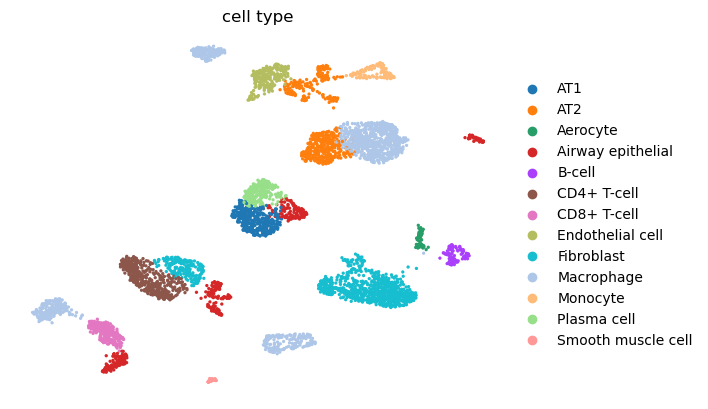

In [51]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)